In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
Spotify = pd.read_csv('/Users/Camer/Downloads/Spring 2025 Classes/Stat 411/Projects/Project 2/Datasets/data.csv')
Spotify.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [18]:
Spotify.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [19]:
Spotify.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [75]:
# Creating interaction term between danceability and energy for 'fun' songs
Spotify['funness'] = Spotify['danceability'] * Spotify['energy']

# Define the response and predictor variables
response = 'popularity'
predictors = ['valence', 'acousticness', 'danceability', 'duration_ms', 'energy',
              'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
              'funness']

X = Spotify[predictors]
y = Spotify[response]

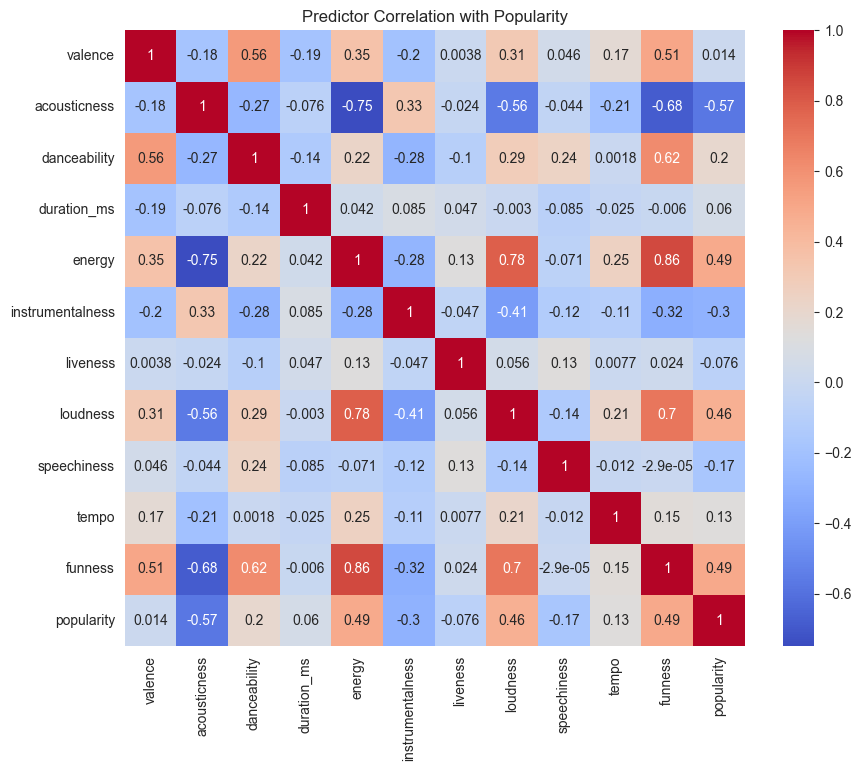

In [76]:
# Sets the size of our graph
plt.figure(figsize = (10, 8))

# Calculates the correlation between each predictor and the response variable
corr = Spotify[predictors + [response]].corr()

# Creates a heatmap of the correlations calculated above
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Predictor Correlation with Popularity')
plt.show()

In [77]:
# Splitting the dataset into training and testing sets to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Linear Regression R²:', r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression R²: 0.45291593899493365
Linear Regression MSE: 261.7891701388435


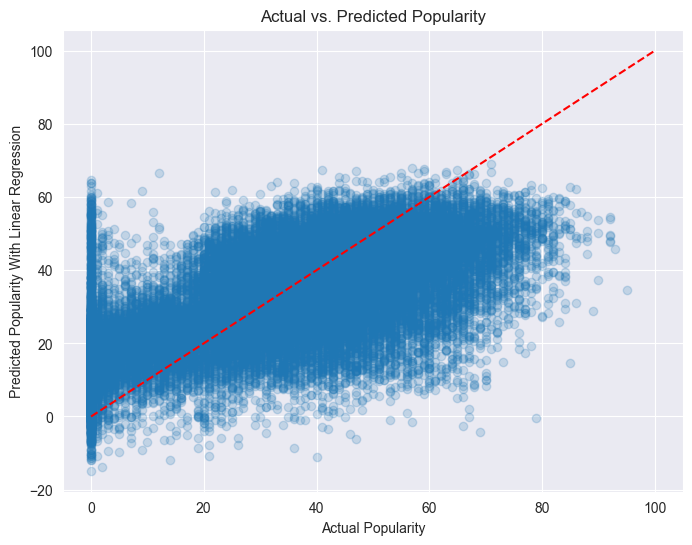

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.2)  # Low alpha = transparent
plt.plot([0, 100], [0, 100], 'r--')  # Perfect prediction line
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity With Linear Regression')
plt.title('Actual vs. Predicted Popularity')
plt.show()

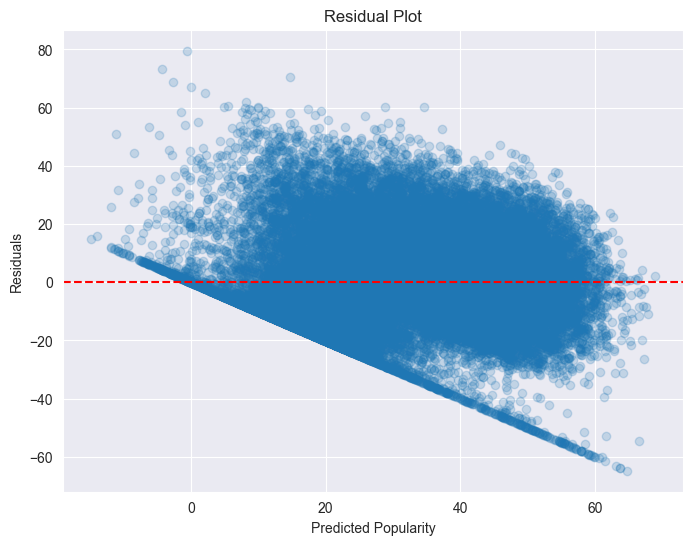

In [88]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, residuals, alpha=0.2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

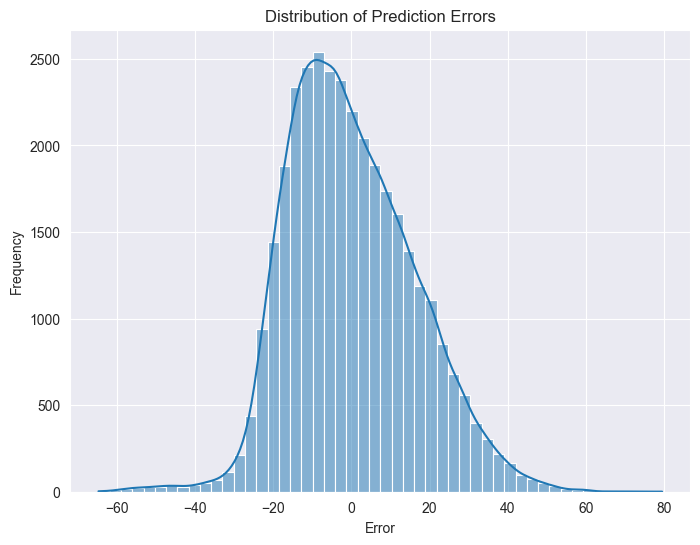

In [92]:
errors = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=50, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Put analysis of first linear multiple regression model here

In [79]:
knn = KNeighborsRegressor(n_neighbors = 500)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN R²:", r2_score(y_test, y_pred_knn))
print("KNN Regression MSE:", mean_squared_error(y_test, y_pred_knn))

KNN R²: 0.12887257983873657
KNN Regression MSE: 416.84951301678825


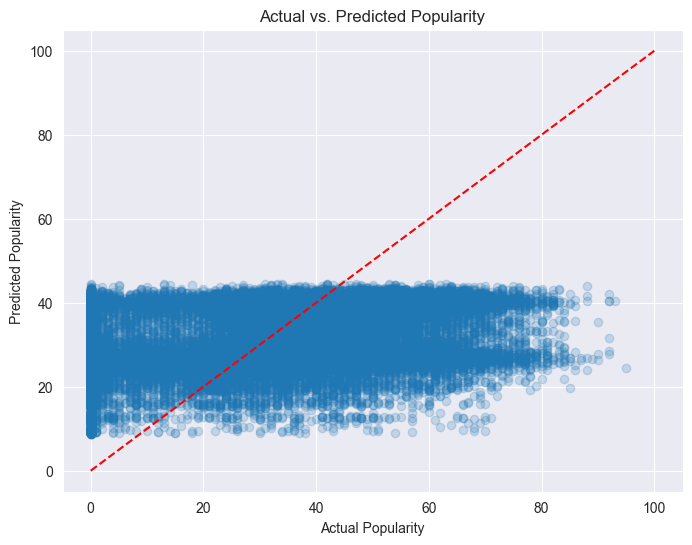

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.2)  # Low alpha = transparent
plt.plot([0, 100], [0, 100], 'r--')  # Perfect prediction line
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Popularity')
plt.show()

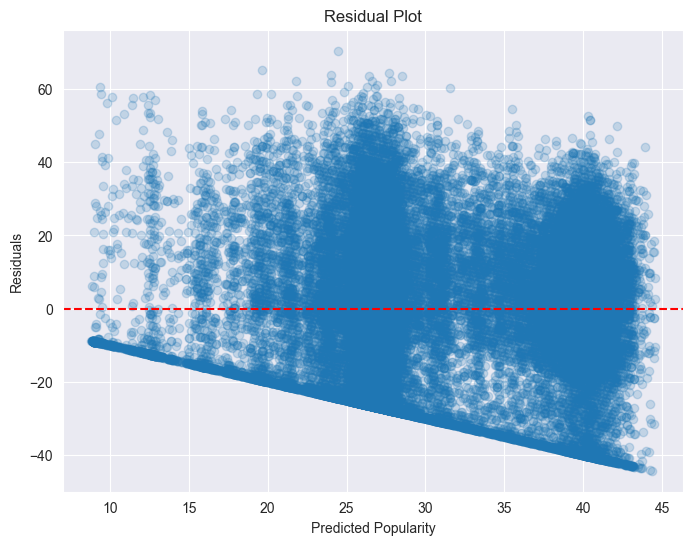

In [89]:
residuals = y_test - y_pred_knn
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_knn, residuals, alpha=0.2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

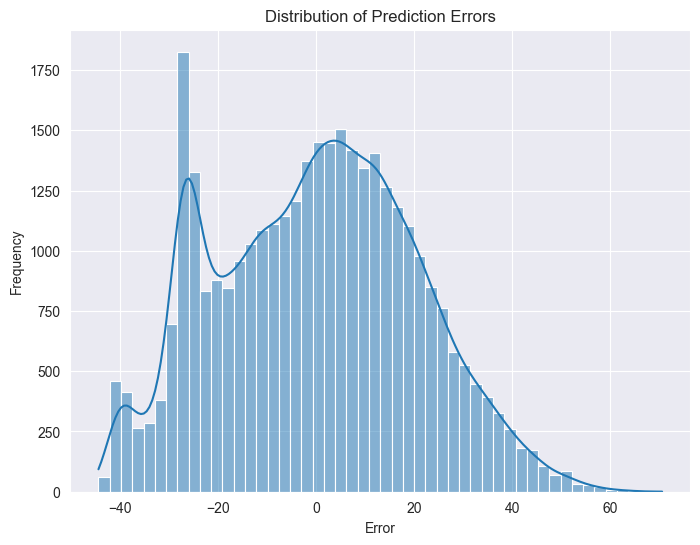

In [93]:
errors = y_test - y_pred_knn
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=50, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Put analysis of first KNN regression model here

In [80]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree R²:", r2_score(y_test, y_pred_tree))
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred_tree))

Decision Tree R²: 0.19960081087674397
Decision Tree Regression MSE: 383.0048331428906


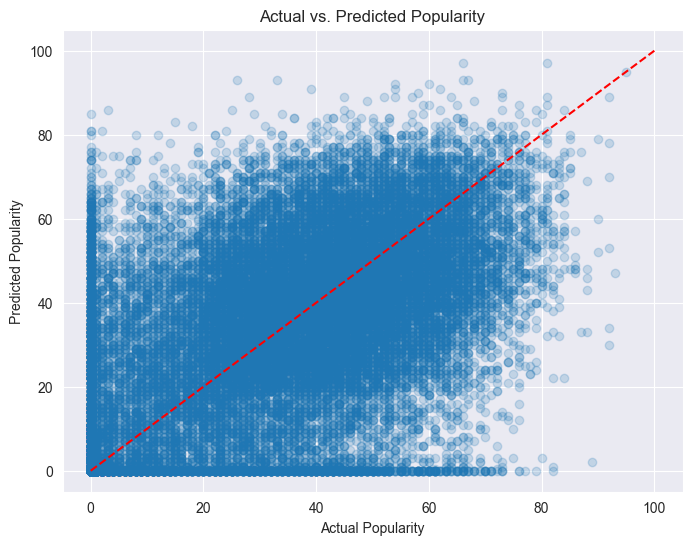

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.2)  # Low alpha = transparent
plt.plot([0, 100], [0, 100], 'r--')  # Perfect prediction line
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Popularity')
plt.show()

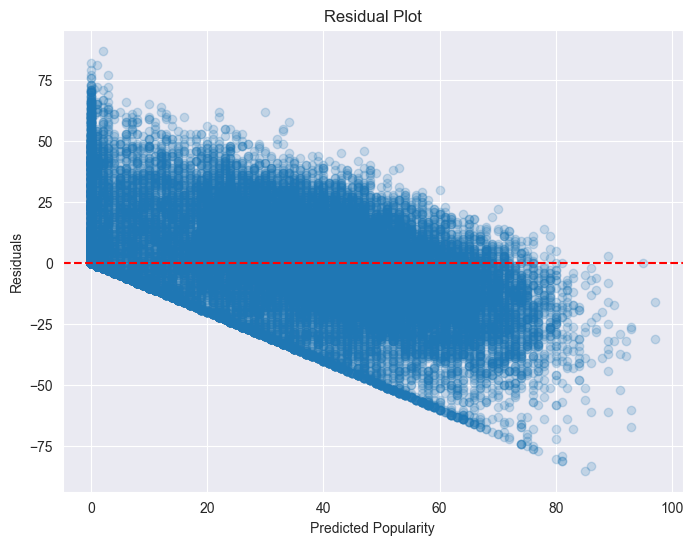

In [90]:
residuals = y_test - y_pred_tree
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_tree, residuals, alpha=0.2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

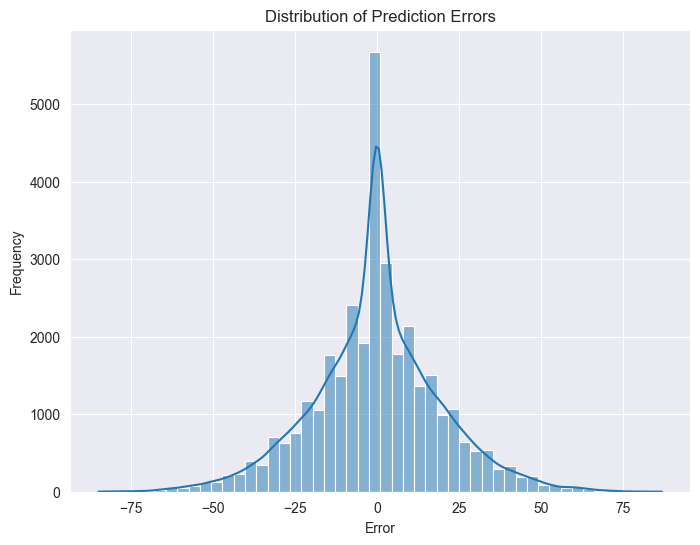

In [94]:
errors = y_test - y_pred_tree
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=50, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Put analysis of first decision tree regression model here


In [81]:
forest = RandomForestRegressor(n_estimators = 25)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_forest))
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_forest))

Random Forest R²: 0.5834735575094968
Random Forest Regression MSE: 199.31509523444834


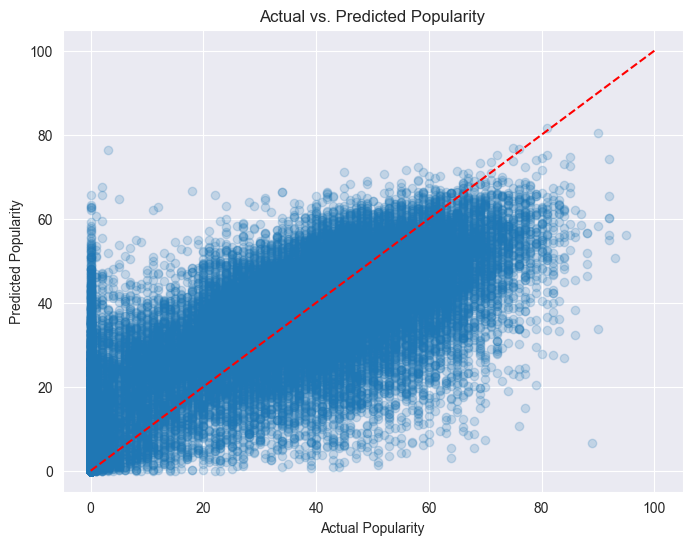

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_forest, alpha=0.2)  # Low alpha = transparent
plt.plot([0, 100], [0, 100], 'r--')  # Perfect prediction line
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Popularity')
plt.show()

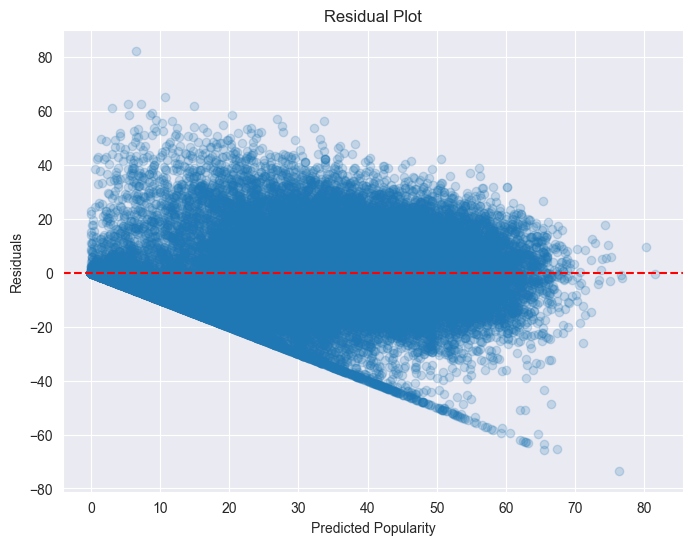

In [91]:
residuals = y_test - y_pred_forest
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_forest, residuals, alpha=0.2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

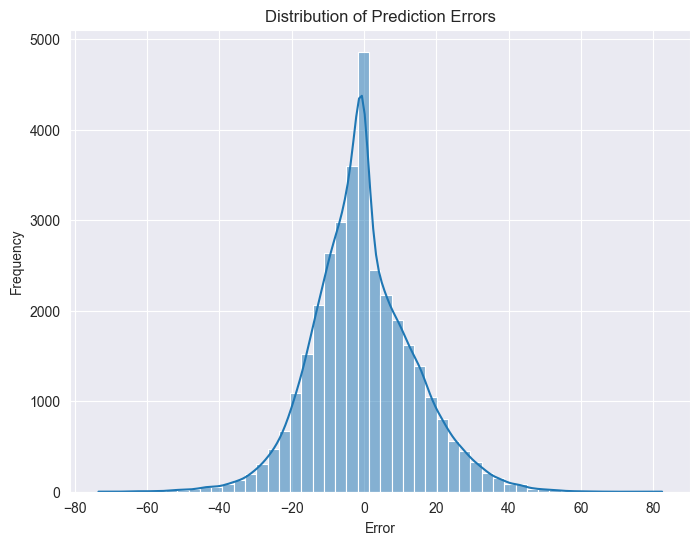

In [95]:
errors = y_test - y_pred_forest
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=50, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Put analysis of first random forrest regression model here